# ATP 2021/22

## TPC7 - Processamento de Datasets

* Identificador: TPC7
* Título: Processamento de Datasets
* Data Início: 2021-11-25
* Data Fim: 2021-12-02
* Supervisor: José Carlos Leite Ramalho, https://www.di.uminho.pt/~jcr/ 
* Autor: Mariana Martins Sousa, A96225

### Resumo:

De modo a dar continuação ao material lecionado na aula Teórico-Prática 7, neste ficheiro, elaborado em linguagem _Python_ , encontra-se o código fonte com a resolução dos exercícios propostos na __Ficha Técnica__, sendo que permite __ler datasets, processá-los e produzir dados estatísticos__.

Este programa processa a informação contida no ficheiro __alunos.csv__, começando pela __leitura__ da base de dados através da _função lerDataset()_ seguido pela __listagem__ da mesma (_função listarDataset()_ ), com o propósito de o utilizador visualizar toda a informação presente no ficheiro, dividindo-a nas respetivas colunas id, nome, curso, e média calculada dos tpcs 1,2,3 e 4 realizados.

Este código também possibilita ao utilizador encontrar um dado aluno através do seu id registado, recorrendo à _função consultarDataset()_ e ainda selecionar os 10 alunos com as médias mais altas, devolvendo ao utilizador a sua informação, usando para tal a _função top10()_ .

É possível ainda fazer a distribuição dos alunos pelo curso, _função distribPorCurso()_ , ou pelas médias dos tpcs, _função distribPorMedia()_ .

Para a produção dos __gráficos em barra__ das __distribuições por curso e por média__ , recorre-se à biblioteca _matplotlib_ juntamente com as _funções plotDistribPorCurso() e plotDistribPorMedia()_ , respetivamente.

#### Exercício 1 - Leitura

In [31]:
def lerDataset(fnome):
    bd = []
    f = open(fnome, encoding='utf-8')
    f.readline()
    
    for linha in f :
        novaLinha = linha.replace("\n", "")
        campos = novaLinha.split(",")
        
        aluno = {}
        aluno['id'] = campos[0]
        aluno['nome'] = campos[1]
        aluno['curso'] = campos[2]
        listaTPC = []
        for tpc in campos[3:] :
            listaTPC.append(int(tpc))
        aluno['tpc'] = listaTPC
        
        bd.append(aluno)
    return bd

BDalunos = lerDataset('alunos.csv')

#### Exercício 2 - Listagem

In [12]:
def listarDataset(bd):
    print("id   | nome               | curso            | média TPC   ")
    print("-----------------------------------------------------------")
    for aluno in bd :
        print (aluno['id'] + " | " + aluno['nome'] + " | " + aluno['curso'] + " | " + str(int((sum(aluno['tpc']))/len(aluno['tpc']))))
        
listarDataset(BDalunos)

id   | nome               | curso            | média TPC   
-----------------------------------------------------------
"a1" | "Aysha Melanie Gilberto" | "LEI" | 11
"a2" | "Igor André Cantanhede" | "ENGFIS" | 16
"a3" | "Laurénio Narciso" | "ENGFIS" | 12
"a4" | "Jasnoor Casegas" | "LCC" | 15
"a5" | "Tawseef Rebouças" | "ENGBIOM" | 14
"a6" | "Eryk Clementino" | "LEI" | 13
"a7" | "Ianna Noivo" | "ENGBIOM" | 15
"a8" | "Ayla Thaissa Reina" | "ENGBIOM" | 11
"a9" | "Cássia Viviane Coitã" | "ENGFIS" | 13
"a10" | "Koby Vindima" | "LEI" | 14
"a11" | "Gustavo Martim Hernandez" | "ENGBIOM" | 11
"a12" | "Siddarta Beiriz" | "LEI" | 14
"a13" | "Daniela Patrícia Montes" | "ENGBIOM" | 16
"a14" | "Kaylla Pessego" | "LCC" | 14
"a15" | "Bianca Cristina Primitivo" | "ENGBIOM" | 13
"a16" | "Magna Galhardo" | "ENGFIS" | 15
"a17" | "Grace Isabel Patriarca" | "LCC" | 12
"a18" | "Saubhagya Buco" | "LEI" | 15
"a19" | "Ivo Vicente Boisa" | "ENGBIOM" | 13
"a20" | "Vivaan Castilhos" | "ENGFIS" | 13
"a21" | "Layana 

#### Exercício 3 - Consulta de Registo

In [30]:
def consultarDataset(bd, alunoId) :
    listaId = []
    for aluno in bd :
        listaId.append(aluno['id'])
    
    contador = 0
    for a in listaId :
        if a == alunoId :
            med = int((sum(bd[contador]['tpc']))/len(bd[contador]['tpc']))
            print(bd[contador]['id'] + " | " + bd[contador]['nome'] + " | " + bd[contador]['curso'] + " | " + str(med))
        else :
            contador = contador + 1
            
consultarDataset(BDalunos, '"a46"')

"a46" | "Yuri Gabriel Baganha" | "LCC" | 15


#### Exercício 4 - Top 10

In [24]:
def ordenar(lista) :
    trocas = False
    for i in range(len(lista)) :
        if i < (len(lista) - 1) :
            if lista[i][1] < lista[i+1][1] :
                lista[i], lista[i+1] = lista[i+1], lista[i]
                trocas = True
    if trocas == True :
        (ordenar(lista))
    return lista

def top10(bd):
    listaMed = []
    a = 0
    for aluno in bd :
        listaMed.append((a, int((sum(aluno['tpc']))/len(aluno['tpc']))))
        a = a + 1
    listaMed = ordenar(listaMed)
    for i in range(0, 10) :
        aluno = listaMed[i][0]
        print(bd[aluno]['id'] + " | " + bd[aluno]['nome'] + " | " + bd[aluno]['curso'] + " | " + str(listaMed[i][1]))
        
top10(BDalunos)

"a47" | "Moisés João Cornelio" | "LEI" | 18
"a80" | "Maria Carolina Josué" | "ENGFIS" | 18
"a32" | "Ariane Sofia Foja" | "LEI" | 17
"a56" | "Hakeem Brazão" | "LEI" | 17
"a74" | "Vânia Sofia Porfirio" | "ENGBIOM" | 17
"a84" | "Laudário Frasão" | "LCC" | 17
"a2" | "Igor André Cantanhede" | "ENGFIS" | 16
"a13" | "Daniela Patrícia Montes" | "ENGBIOM" | 16
"a31" | "Eva Manuel Caio" | "ENGFIS" | 16
"a36" | "Diana Beatriz Boavista" | "LCC" | 16


#### Exercício 5 - Distribuição por Curso

In [15]:
def distribPorCurso(bd):
    distribCurso = {}
    for aluno in bd :
        if aluno['curso'] in distribCurso.keys() :
            distribCurso[aluno['curso']] = distribCurso[aluno['curso']] + 1
        else :
            distribCurso[aluno['curso']] = 1
    return distribCurso

print(distribPorCurso(BDalunos))

{'"LEI"': 23, '"ENGFIS"': 32, '"LCC"': 20, '"ENGBIOM"': 25}


#### Exercício 6 - Distribuição por Médias

In [16]:
def distribPorMedia(bd):
    distribMedia = {}
    for aluno in bd :
        aluno['media'] = int((sum(aluno['tpc']))/len(aluno['tpc']))
        if aluno['media'] in distribMedia.keys() :
            distribMedia[aluno['media']] = distribMedia[aluno['media']] + 1
        else :
            distribMedia[aluno['media']] = 1
    return distribMedia

print(distribPorMedia(BDalunos))

{11: 9, 16: 11, 12: 15, 15: 15, 14: 21, 13: 20, 17: 4, 18: 2, 9: 2, 10: 1}


#### Exercício 7 - Gráfico da Distribuição por Curso

In [17]:
import matplotlib.pyplot as plt

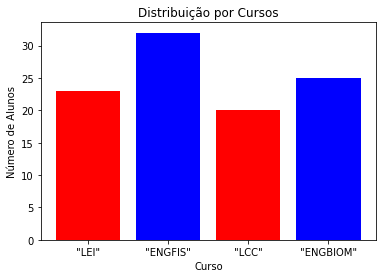

In [18]:
def plotDistribPorCurso(bd):
    BD = distribPorCurso(bd)
    listaCursos = []
    for aluno in bd :
        if aluno['curso'] not in listaCursos :
            listaCursos.append(aluno['curso'])
    
    x = [n for n in range(len(listaCursos))]
    plt.xlabel('Curso')
    
    y = []
    for n in x :
        curso = listaCursos[n]
        y.append(BD[curso])
    plt.ylabel('Número de Alunos')
    
    plt.bar(x, y, tick_label=listaCursos, width=0.8, color=['red', 'blue'])
    plt.title('Distribuição por Cursos')
    
plotDistribPorCurso(BDalunos)

#### Exercício 8 - Gráfico da Distribuição por Médias

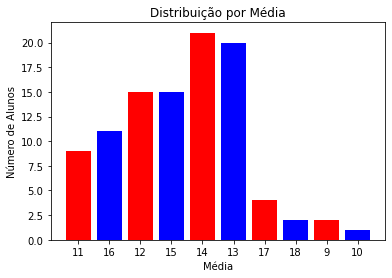

In [19]:
def plotDistribPorMedia(bd):
    BD = distribPorMedia(bd)
    listaMedias = []
    for aluno in bd :
        med = int((sum(aluno['tpc']))/len(aluno['tpc']))
        if med not in listaMedias :
            listaMedias.append(med)
            
    x = [n for n in range(len(listaMedias))]
    plt.xlabel('Média')
    
    y = []
    for n in x :
        media = listaMedias[n]
        y.append(BD[media])
    plt.ylabel('Número de Alunos')
    
    plt.bar(x, y, tick_label=listaMedias, width=0.8, color=['red', 'blue'])
    plt.title('Distribuição por Média')
    
plotDistribPorMedia(BDalunos)